In [155]:
%pip install forex-python
%pip install pandas
%pip install python-dotenv
%pip install seaborn
%pip install matplotlib
%pip install pyodbc
%pip install numpy

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writ

In [156]:
# Importing the Modules needed
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import pyodbc #just installed with pip
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import warnings 
warnings.filterwarnings('ignore')

from forex_python.converter import CurrencyRates
import re 
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway



In [157]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")
# driver = environment_variables.get("DRIVER")


connection_string = "DRIVER={ODBC Driver 17 for SQL Server};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [159]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)
#connection = pyodbc.connect(connection_string)


In [160]:
query2020 = "Select * from dbo.LP1_startup_funding2020"
query2021 = "Select * from dbo.LP1_startup_funding2021"
data2020 = pd.read_sql(query2020, connection)
data2021 = pd.read_sql(query2021, connection)

In [161]:
data2018 = pd.read_csv('startup_funding2018.csv')
data2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company,Unnamed: 6
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,NaN
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN


In [162]:
data2019 = pd.read_csv('startup_funding2019.csv')
data2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [163]:
data2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [164]:
data2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


### DATA 2018 CLEANING

In [165]:
data2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
 6   Unnamed: 6     1 non-null      object
dtypes: object(7)
memory usage: 28.9+ KB


In [166]:
data2018.isnull().sum() #calculate the number of missing values (null or NaN values) in each column of a DataFrame.

Company Name       0
Industry           0
Round/Series       0
Amount             0
Location           0
About Company      0
Unnamed: 6       525
dtype: int64

In [167]:
missing_value = ['','N/a','NAN','na']
data2018 = pd.read_csv('startup_funding2018.csv', na_values=missing_value)
data2018.isnull().sum()

Company Name       0
Industry           0
Round/Series       0
Amount             0
Location           0
About Company      0
Unnamed: 6       525
dtype: int64

In [168]:
data2018.shape

(526, 7)

In [169]:
data2018.columns

Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company', 'Unnamed: 6'],
      dtype='object')

In [170]:
data2018['Unnamed: 6']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
521    NaN
522    NaN
523    NaN
524    NaN
525    NaN
Name: Unnamed: 6, Length: 526, dtype: object

**Cleaning the 'Location' column**

In [171]:
# Bangalore and Bengaluru are different names for the same city.
# Replace all occurrences of 'Bengaluru' with 'Bangalore'.
data2018['Location'] = data2018['Location'].str.replace('Bengaluru', 'Bangalore', case=False)
data2018['Location'] = data2018['Location'].str.replace('Bangalore city', 'Bangalore', case=False)

data2018

,Company Name,Industry,Round/Series,Amount,Location,About Company,Unnamed: 6
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,NaN
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN
...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif...",NaN
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.,NaN
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...,NaN
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...,NaN


**Removing duplications**

In [172]:
data2018.duplicated().sum() #checking if there are duplicates

1

In [173]:
data2018.loc[data2018.duplicated(keep=False ), :]#displaying the duplicated row

,Company Name,Industry,Round/Series,Amount,Location,About Company,Unnamed: 6
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN


In [174]:
data2018 = data2018.drop_duplicates() #Droping duplicate rows
data2018.shape

(525, 7)

**Cleaning 'Amount' column: Data type issues**

In [175]:
data2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   525 non-null    object
 1   Industry       525 non-null    object
 2   Round/Series   525 non-null    object
 3   Amount         525 non-null    object
 4   Location       525 non-null    object
 5   About Company  525 non-null    object
 6   Unnamed: 6     1 non-null      object
dtypes: object(7)
memory usage: 32.8+ KB


In [176]:
data2018['Amount'].head()

0         250000
1    ₹40,000,000
2    ₹65,000,000
3        2000000
4              —
Name: Amount, dtype: object

In [177]:
# Cleaning the Amounts column
data2018['Amount'] = data2018['Amount'].apply(str)
data2018['Amount'].replace(",", "", inplace = True, regex=True)
data2018['Amount'].replace("—", '0', inplace = True, regex=True)
data2018['Amount'].replace("$", "", inplace = True, regex=True)

In [178]:
data2018['Amount']

0         250000
1      ₹40000000
2      ₹65000000
3        2000000
4              0
         ...    
521    225000000
522            0
523         7500
524    ₹35000000
525     35000000
Name: Amount, Length: 525, dtype: object

In [179]:
# Create an instance of the CurrencyRates class
c = CurrencyRates()

# Function to convert INR to USD
def convert_to_usd(amount):
    if isinstance(amount, str) and amount.startswith('₹'):
        amount = amount[1:]  # Remove the currency symbol
        amount = amount.replace(',', '')  # Remove commas if present
        amount = float(amount)  # Convert to float
        return c.convert('INR', 'USD', amount)
    else:
        return amount

# Apply the conversion function to the 'Amount' column
data2018['Amount'] = data2018['Amount'].apply(convert_to_usd)
data2018['Amount'] = data2018['Amount'].apply(lambda x: float(str(x).replace("$","")))
# Define a lambda function to format the amount
format_amount = lambda amount: "{:,.2f}".format(amount)

# Apply the formatting lambda function to the 'Amount' column
data2018['Amount'] = data2018['Amount'].map(format_amount)






In [180]:
data2018['Amount'].isnull().sum()

0

In [181]:
data2018['Amount'].head()

0      250,000.00
1      485,093.94
2      788,277.65
3    2,000,000.00
4            0.00
Name: Amount, dtype: object

In [182]:
#  convert Amount column to float
data2018['Amount'] = data2018['Amount'].str.replace(',', '').astype(float)
data2018['Amount'].head()

0     250000.00
1     485093.94
2     788277.65
3    2000000.00
4          0.00
Name: Amount, dtype: float64

**Drop unwanted column**

In [183]:
data2018.drop(columns=['Unnamed: 6'], inplace=True)

In [184]:
data2019.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')

**Columns renaming**

In [185]:
data2018.rename(columns = {'Company Name':'Company',
                        'Industry':'Sector',
                        'Amount':'Amount',
                        'About Company':'About',
                        'Round/Series' : 'Stage',
                        'What it does' : 'About'},
             inplace = True)

In [186]:
data2018.columns

Index(['Company', 'Sector', 'Stage', 'Amount', 'Location', 'About'], dtype='object')

**Add a new column**

In [187]:
# create a new column 'Year' and set it to 2018 to differentiate it from the other datasets
data2018.insert(0,'Year', 2018)
data2018.head()

,Year,Company,Sector,Stage,Amount,Location,About
0,2018,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.00,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,2018,Happy Cow Dairy,"Agriculture, Farming",Seed,485093.94,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,2018,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,788277.65,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,2018,PayMe India,"Financial Services, FinTech",Angel,2000000.00,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,2018,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0.00,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


### DATA 2019 CLEANING

In [188]:
data2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


**Missing values**

In [189]:
data2019.isnull().sum() #calculate the number of missing values (null or NaN values) in each column of a DataFrame.

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

In [190]:
data2019.shape

(89, 9)

In [191]:
missing_value = ['','N/a','NAN','na']
data2019 = pd.read_csv('startup_funding2019.csv', na_values=missing_value)
data2019.isnull().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

**Cleaning the 'Sector' column**

In [192]:
data2019['Sector'].unique()

array(['Ecommerce', 'Edtech', 'Interior design', 'AgriTech', 'Technology',
       'SaaS', 'AI & Tech', 'E-commerce', 'E-commerce & AR', 'Fintech',
       'HR tech', 'Food tech', 'Health', 'Healthcare', 'Safety tech',
       'Pharmaceutical', 'Insurance technology', 'AI', 'Foodtech', 'Food',
       'IoT', 'E-marketplace', 'Robotics & AI', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media', nan,
       'E-Sports', 'Cosmetics', 'B2B', 'Jewellery', 'B2B Supply Chain',
       'Games', 'Food & tech', 'Accomodation', 'Automotive tech',
       'Legal tech', 'Mutual Funds', 'Cybersecurity', 'Automobile',
       'Sports', 'Healthtech', 'Yoga & wellness', 'Virtual Banking',
       'Transportation', 'Transport & Rentals',
       'Marketing & Customer loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking'], dtype=object)

In [193]:
# Replace "Edtech" with "EdTech" in the 'Sector' column
data2019['Sector'] = data2019['Sector'].replace('Edtech', 'EdTech')
data2019['Sector'].unique()

array(['Ecommerce', 'EdTech', 'Interior design', 'AgriTech', 'Technology',
       'SaaS', 'AI & Tech', 'E-commerce', 'E-commerce & AR', 'Fintech',
       'HR tech', 'Food tech', 'Health', 'Healthcare', 'Safety tech',
       'Pharmaceutical', 'Insurance technology', 'AI', 'Foodtech', 'Food',
       'IoT', 'E-marketplace', 'Robotics & AI', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media', nan,
       'E-Sports', 'Cosmetics', 'B2B', 'Jewellery', 'B2B Supply Chain',
       'Games', 'Food & tech', 'Accomodation', 'Automotive tech',
       'Legal tech', 'Mutual Funds', 'Cybersecurity', 'Automobile',
       'Sports', 'Healthtech', 'Yoga & wellness', 'Virtual Banking',
       'Transportation', 'Transport & Rentals',
       'Marketing & Customer loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking'], dtype=object)

In [194]:
# Replace "Fintech" with "FinTech" in the 'Sector' column
data2019['Sector'] = data2019['Sector'].replace('Fintech', 'FinTech')
data2019['Sector'].unique()

array(['Ecommerce', 'EdTech', 'Interior design', 'AgriTech', 'Technology',
       'SaaS', 'AI & Tech', 'E-commerce', 'E-commerce & AR', 'FinTech',
       'HR tech', 'Food tech', 'Health', 'Healthcare', 'Safety tech',
       'Pharmaceutical', 'Insurance technology', 'AI', 'Foodtech', 'Food',
       'IoT', 'E-marketplace', 'Robotics & AI', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media', nan,
       'E-Sports', 'Cosmetics', 'B2B', 'Jewellery', 'B2B Supply Chain',
       'Games', 'Food & tech', 'Accomodation', 'Automotive tech',
       'Legal tech', 'Mutual Funds', 'Cybersecurity', 'Automobile',
       'Sports', 'Healthtech', 'Yoga & wellness', 'Virtual Banking',
       'Transportation', 'Transport & Rentals',
       'Marketing & Customer loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking'], dtype=object)

**Cleaning the 'Stage' column**

In [195]:
# Replace all missing values in the 'Stage' column with the string "Notknown".
data2019['Stage'] = data2019['Stage'].fillna('Notknown')
data2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",Notknown
1,Ruangguru,2014.0,Mumbai,EdTech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,EdTech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",Notknown


In [196]:
# Get unique funding stages
data2019['Stage'].unique()

array(['Notknown', 'Series C', 'Fresh funding', 'Series D',
       'Pre series A', 'Series A', 'Series G', 'Series B',
       'Post series A', 'Seed funding', 'Seed fund', 'Series E',
       'Series F', 'Series B+', 'Seed round', 'Pre-series A'],
      dtype=object)

**droping unwanted columns and renaming others**

In [197]:
# Droping unwanted columns

data2019.drop(columns=['Founded','Founders', 'Investor'], inplace=True)

In [198]:
#Renaming columnsb
data2019.rename(columns = {
                        'Amount($)':'Amount',
                        'HeadQuarter':'Location',
                        'What it does':'About',
                        'Company/Brand':'Company',
                        },
             inplace = True)

In [199]:
data2019.columns

Index(['Company', 'Location', 'Sector', 'About', 'Amount', 'Stage'], dtype='object')

**Cleaning the 'Location' column**

In [200]:
# Replace all missing values in the 'Location' column with the string "Notavailable".
data2019['Location'] = data2019['Location'].fillna('Notavailable')
data2019.head()

,Company,Location,Sector,About,Amount,Stage
0,Bombay Shaving,Notavailable,Ecommerce,Provides a range of male grooming products,"$6,300,000",Notknown
1,Ruangguru,Mumbai,EdTech,A learning platform that provides topic-based ...,"$150,000,000",Series C
2,Eduisfun,Mumbai,EdTech,It aims to make learning fun via games.,"$28,000,000",Fresh funding
3,HomeLane,Chennai,Interior design,Provides interior designing solutions,"$30,000,000",Series D
4,Nu Genes,Telangana,AgriTech,"It is a seed company engaged in production, pr...","$6,000,000",Notknown


In [201]:
data2019.isnull().sum()

Company     0
Location    0
Sector      5
About       0
Amount      0
Stage       0
dtype: int64

**Cleaning 'Amount' column**

In [202]:
data2019['Amount'].unique()

array(['$6,300,000', '$150,000,000', '$28,000,000', '$30,000,000',
       '$6,000,000', 'Undisclosed', '$1,000,000', '$20,000,000',
       '$275,000,000', '$22,000,000', '$5,000,000', '$140,500',
       '$540,000,000', '$15,000,000', '$182,700', '$12,000,000',
       '$11,000,000', '$15,500,000', '$1,500,000', '$5,500,000',
       '$2,500,000', '$140,000', '$230,000,000', '$49,400,000',
       '$32,000,000', '$26,000,000', '$150,000', '$400,000', '$2,000,000',
       '$100,000,000', '$8,000,000', '$100,000', '$50,000,000',
       '$120,000,000', '$4,000,000', '$6,800,000', '$36,000,000',
       '$5,700,000', '$25,000,000', '$600,000', '$70,000,000',
       '$60,000,000', '$220,000', '$2,800,000', '$2,100,000',
       '$7,000,000', '$311,000,000', '$4,800,000', '$693,000,000',
       '$33,000,000'], dtype=object)

In [203]:
# Cleaning Amount($)

data2019['Amount']=data2019['Amount'].replace('Undisclosed',np.nan) #replacing Undisclosed values.
data2019['Amount']=data2019['Amount'].str.replace('[$,]','').astype(float)
data2019['Amount'].unique()

array([6.300e+06, 1.500e+08, 2.800e+07, 3.000e+07, 6.000e+06,       nan,
       1.000e+06, 2.000e+07, 2.750e+08, 2.200e+07, 5.000e+06, 1.405e+05,
       5.400e+08, 1.500e+07, 1.827e+05, 1.200e+07, 1.100e+07, 1.550e+07,
       1.500e+06, 5.500e+06, 2.500e+06, 1.400e+05, 2.300e+08, 4.940e+07,
       3.200e+07, 2.600e+07, 1.500e+05, 4.000e+05, 2.000e+06, 1.000e+08,
       8.000e+06, 1.000e+05, 5.000e+07, 1.200e+08, 4.000e+06, 6.800e+06,
       3.600e+07, 5.700e+06, 2.500e+07, 6.000e+05, 7.000e+07, 6.000e+07,
       2.200e+05, 2.800e+06, 2.100e+06, 7.000e+06, 3.110e+08, 4.800e+06,
       6.930e+08, 3.300e+07])

In [204]:
data2019.columns

Index(['Company', 'Location', 'Sector', 'About', 'Amount', 'Stage'], dtype='object')

data2019['Amount'].isnull().sum()

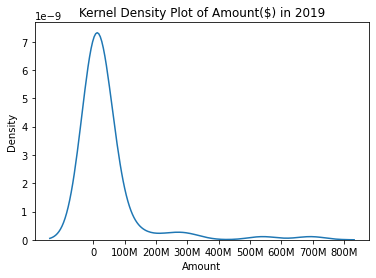

In [205]:
# Plotting a kernel density (KDE) plot to show the distribution of values in the 'Amount($)' column for the year 2019.

sns.kdeplot(data2019['Amount'])
plt.title('Kernel Density Plot of Amount($) in 2019')
plt.xlabel('Amount')
plt.xticks([0, 1e8, 2e8, 3e8, 4e8, 5e8, 6e8, 7e8, 8e8], ['0', '100M', '200M', '300M', '400M', '500M', '600M', '700M', '800M'])
plt.show()

In [206]:
impute_value = data2019['Amount'].median()
data2019['Amount']= data2019['Amount'].fillna(impute_value)

In [207]:
data2019['Amount'].isnull().sum()

0

**Add a new column**

In [208]:
# create a new column 'Year' and set it to 2019 to differentiate it from the other datasets
data2019.insert(0,'Year', 2019) 
data2019.head()

,Year,Company,Location,Sector,About,Amount,Stage
0,2019,Bombay Shaving,Notavailable,Ecommerce,Provides a range of male grooming products,6300000.0,Notknown
1,2019,Ruangguru,Mumbai,EdTech,A learning platform that provides topic-based ...,150000000.0,Series C
2,2019,Eduisfun,Mumbai,EdTech,It aims to make learning fun via games.,28000000.0,Fresh funding
3,2019,HomeLane,Chennai,Interior design,Provides interior designing solutions,30000000.0,Series D
4,2019,Nu Genes,Telangana,AgriTech,"It is a seed company engaged in production, pr...",6000000.0,Notknown


### CLEANING DATA 2020

In [209]:
data2020.head() #showing the first five rows

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [210]:
data2020.info() # Get inforamation about the data2020 dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.5+ KB


In [211]:
data2020.columns #accessing specific columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'column10'],
      dtype='object')

In [212]:
data2020.describe(include='object') # Getting general descriptive statistics of the data2 dataFrame

,Company_Brand,HeadQuarter,Sector,What_it_does,Founders,Investor,Stage,column10
count,1055,961,1042,1055,1043,1017,591,2
unique,905,77,302,990,927,848,42,2
top,Nykaa,Bangalore,Fintech,Onine learning platform,Falguni Nayar,Venture Catalysts,Series A,Seed Round
freq,6,317,80,4,6,20,96,1


In [213]:
data2020.describe(include='float') # Getting general descriptive statistics for float columns

,Founded,Amount
count,842.000000,8.010000e+02
mean,2015.363420,1.130430e+08
std,4.097909,2.476635e+09
min,1973.000000,1.270000e+04
25%,2014.000000,1.000000e+06
50%,2016.000000,3.000000e+06
75%,2018.000000,1.100000e+07
max,2020.000000,7.000000e+10


**Handling Duplicated Data**

In [214]:
# checking for duplicated values 

columns_to_check3 = ['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does', 'Founders', 'Investor', 'Amount', 'Stage']
for column2 in columns_to_check3:
    has_duplicates2 = data2020[column2].duplicated().any()
    print(f'{column2}: {has_duplicates2}')

Company_Brand: True
Founded: True
HeadQuarter: True
Sector: True
What_it_does: True
Founders: True
Investor: True
Amount: True
Stage: True


In [215]:
# below we are dropping the duplicates rows 

data2020.drop_duplicates(subset=['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does', 'Founders', 'Investor', 'Amount', 'Stage'], inplace=True)

#### Handling Categorical Data

In [216]:
data2020.isna().sum() #looking for missing values in dataFrame 2

Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            253
Stage             462
column10         1050
dtype: int64

**Cleaning HeadQuarter column**

In [217]:
# Replace all missing values in the 'HeadQuarter' column with the string "Unavailable".
data2020['HeadQuarter'] = data2020['HeadQuarter'].fillna('Notavailable')
data2020.tail()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,None,None
1051,EpiFi,NaN,Notavailable,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round,None
1052,Purplle,2012.0,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,None,None
1053,Shuttl,2015.0,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C,None
1054,Pando,2017.0,Chennai,Logitech,Networked logistics management software,"Jayakrishnan, Abhijeet Manohar",Chiratae Ventures,9000000.0,Series A,None


In [218]:
data2020['HeadQuarter'].unique() #displaying the unique values found in the 'HeadQuarter' column.

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli, Tamilnadu', 'Thane',
       'Notavailable', 'Singapore', 'Gurugram', 'Gujarat', 'Haryana',
       'Kerala', 'Jodhpur', 'Jaipur, Rajastan', 'Delhi',
       'Frisco, Texas, United States', 'California', 'Dhingsara, Haryana',
       'New York, United States', 'Patna',
       'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'Palmwoods, Queensland, Australia', 'France',
       'San Francisco Bay Area, West Coast, Western US',
       'Trivandrum, Kerala, India', 'Cochin', 'Sam

In [219]:
# Bangalore and Bengaluru are different names for the same city.
# Replace all occurrences of 'Bengaluru' with 'Bangalore'
data2020['HeadQuarter'] = data2020['HeadQuarter'].str.replace('Bengaluru', 'Bangalore', case=False)
data2020

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None
...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,None,None
1051,EpiFi,NaN,Notavailable,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round,None
1052,Purplle,2012.0,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,None,None
1053,Shuttl,2015.0,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C,None


**Cleaning the 'Sector' column**

In [220]:
# Replace all missing values in the 'Sector' column with the string "Unknown".
data2020['Sector'] = data2020['Sector'].fillna('Unknown')
data2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [221]:
# Replace "Fintech" with "FinTech" in the 'Sector' column
data2020['Sector'] = data2020['Sector'].replace('Fintech', 'FinTech')
data2020['Sector'].unique()

array(['AgriTech', 'EdTech', 'Hygiene management', 'Escrow',
       'Networking platform', 'FinTech', 'Crowdsourcing',
       'Food & Bevarages', 'HealthTech', 'Fashion startup',
       'Food Industry', 'Food Delivery', 'Virtual auditing startup',
       'E-commerce', 'Gaming', 'Work fulfillment', 'AI startup',
       'Telecommunication', 'Logistics', 'Tech Startup', 'Sports',
       'Retail', 'Medtech', 'Tyre management', 'Cloud company',
       'Software company', 'Venture capitalist', 'Renewable player',
       'IoT startup', 'SaaS startup', 'Aero company', 'Marketing company',
       'Retail startup', 'Co-working Startup', 'Finance company',
       'Tech company', 'Solar Monitoring Company',
       'Video sharing platform', 'Gaming startup',
       'Video streaming platform', 'Consumer appliances',
       'Blockchain startup', 'Conversational AI platform', 'Real Estate',
       'SaaS platform', 'AI platform', 'Fusion beverages', 'HR Tech',
       'Job portal', 'Hospitality', 'Digit

In [222]:
# Replace "Edtech" with "EdTech" in the 'Sector' column
data2020['Sector'] =data2020['Sector'].replace('Edtech', 'EdTech')
data2020['Sector'].unique()

array(['AgriTech', 'EdTech', 'Hygiene management', 'Escrow',
       'Networking platform', 'FinTech', 'Crowdsourcing',
       'Food & Bevarages', 'HealthTech', 'Fashion startup',
       'Food Industry', 'Food Delivery', 'Virtual auditing startup',
       'E-commerce', 'Gaming', 'Work fulfillment', 'AI startup',
       'Telecommunication', 'Logistics', 'Tech Startup', 'Sports',
       'Retail', 'Medtech', 'Tyre management', 'Cloud company',
       'Software company', 'Venture capitalist', 'Renewable player',
       'IoT startup', 'SaaS startup', 'Aero company', 'Marketing company',
       'Retail startup', 'Co-working Startup', 'Finance company',
       'Tech company', 'Solar Monitoring Company',
       'Video sharing platform', 'Gaming startup',
       'Video streaming platform', 'Consumer appliances',
       'Blockchain startup', 'Conversational AI platform', 'Real Estate',
       'SaaS platform', 'AI platform', 'Fusion beverages', 'HR Tech',
       'Job portal', 'Hospitality', 'Digit

**Cleaning the 'Stage' column**

In [223]:
# Replace all missing values in the 'Stage' column with the string "Unknown".
data2020['Stage'] = data2020['Stage'].fillna('Notknown')
data2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,Notknown,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,Notknown,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,Notknown,None


In [224]:
# Get unique funding stages
data2020['Stage'].unique()

array(['Notknown', 'Pre-seed', 'Seed', 'Pre-series A', 'Pre-series',
       'Series C', 'Series A', 'Series B', 'Debt', 'Pre-series C',
       'Pre-series B', 'Series E', 'Bridge', 'Series D', 'Series B2',
       'Series F', 'Pre- series A', 'Edge', 'Series H', 'Pre-Series B',
       'Seed A', 'Series A-1', 'Seed Funding', 'Pre-Seed', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Pre series A', 'Seed Round', 'Bridge Round', 'Pre seed round',
       'Pre series B', 'Pre series C', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Seed funding'], dtype=object)

In [225]:
data2020["column10"].value_counts() # Calculate the frequency count of unique values in the "Amount" column

Seed Round    1
Pre-Seed      1
Name: column10, dtype: int64

In [226]:
data2020[data2020['column10'].isin(['Pre-Seed','Seed Round'])] #checking if the values in the 'column10' column match either 'Pre-Seed' or 'Seed Round'.

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
611,Walrus,2019.0,Bangalore,FinTech,It provides banking solutions for teens and yo...,"Bhagaban Behera, Sriharsha Shetty, Nakul Kelkar",Better Capital,NaN,Pre-Seed,Pre-Seed
613,goDutch,NaN,Mumbai,FinTech,Group Payments platform,"Aniruddh Singh, Riyaz Khan, Sagar Sheth","Matrix India, Y Combinator, Global Founders Ca...",1700000.0,Seed Round,Seed Round


In [227]:
data2020['Sector'].unique # checking for unique values in the Sector column 

<bound method Series.unique of 0                 AgriTech
1                   EdTech
2       Hygiene management
3                   Escrow
4                 AgriTech
               ...        
1050                EdTech
1051               FinTech
1052             Cosmetics
1053             Transport
1054              Logitech
Name: Sector, Length: 1052, dtype: object>

In [228]:
data2020['Stage'].unique # checking the unique values in the data set

<bound method Series.unique of 0         Notknown
1         Pre-seed
2         Pre-seed
3         Notknown
4         Notknown
           ...    
1050      Notknown
1051    Seed Round
1052      Notknown
1053      Series C
1054      Series A
Name: Stage, Length: 1052, dtype: object>

In [229]:
# checking for '-' symbol within the columns
data2020_to_check_colomns = ['Company_Brand','HeadQuarter', 'Sector', 'What_it_does','Stage','Amount']
for col in data2020_to_check_colomns:
    dash_symbols = data2020[col].astype(str).str.contains('—').any()
    print(f"{col}: {dash_symbols}")

Company_Brand: False
HeadQuarter: False
Sector: False
What_it_does: False
Stage: False
Amount: False


In [230]:
# checking for '$' symbol within the columns
data2020_to_check_colomns = ['Company_Brand','HeadQuarter', 'Sector', 'What_it_does','Stage','Amount']

for col in data2020_to_check_colomns:
    dash_symbols = data2020[col].astype(str).str.contains('$').any()
    print(f"{col}: {dash_symbols}")

Company_Brand: True
HeadQuarter: True
Sector: True
What_it_does: True
Stage: True
Amount: True


**Cleaning 'Amount' column**

In [231]:
# Cleaning the Amounts column

data2020['Amount'] = data2020['Amount'].apply(str)
data2020['Amount'].replace(",", "", inplace = True, regex=True)
data2020['Amount'].replace("$", "", inplace = True, regex=True)
data2020['Company_Brand'].replace("$", "", inplace = True, regex=True)
data2020['HeadQuarter'].replace("$", "", inplace = True, regex=True)
data2020['Sector'].replace("$", "", inplace = True, regex=True)
data2020['What_it_does'].replace("$", "", inplace = True, regex=True)
data2020['Stage'].replace("$", "", inplace = True, regex=True)

In [232]:
data2020['Amount'] = data2020['Amount'].astype(float) #converting the values in the "Amount" column of DataFrame data2020 to the float data type.

In [233]:
data2020["Amount"] # checking the amount column to comfirm the changes 

0         200000.0
1         100000.0
2              NaN
3         400000.0
4         340000.0
           ...    
1050     1500000.0
1051    13200000.0
1052     8000000.0
1053     8043000.0
1054     9000000.0
Name: Amount, Length: 1052, dtype: float64

In [234]:
data2020['Amount'].min()

12700.0

In [235]:
data2020['Amount'].median()

3000000.0

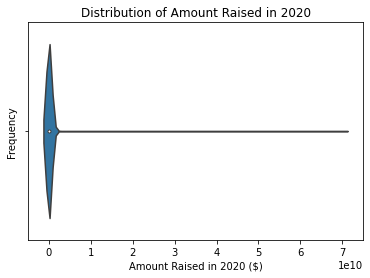

In [236]:
# Create a violin plot to show the distribution of the amount raised in 2020
sns.violinplot(x=data2020['Amount'])
plt.title('Distribution of Amount Raised in 2020')
# Set the x-axis label
plt.xlabel('Amount Raised in 2020 ($)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [237]:
impute_value = data2020['Amount'].median()
data2020['Amount']= data2020['Amount'].fillna(impute_value)

In [238]:
data2020['Amount'].isnull().sum()

0

**Droping unwanted columns and rename others**

In [239]:
data2020 = data2020.drop(['column10','Founded','Founders','Investor'], axis=1) #dropping specific columns from the DataFrame 

In [240]:
new_column_names = {'Company_Brand': 'Company', 'What_it_does': 'About', 'HeadQuarter': 'Location'} # Renaming columns
data2020 = data2020.rename(columns=new_column_names)

**Creating a new column 'Year' and setting it to 2020**

In [241]:
# create a new column 'Year' and set it to 2020 to differentiate it from the other datasets
data2020.insert(0,'Year', 2020)
data2020.head()

,Year,Company,Location,Sector,About,Amount,Stage
0,2020,Aqgromalin,Chennai,AgriTech,Cultivating Ideas for Profit,200000.0,Notknown
1,2020,Krayonnz,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,100000.0,Pre-seed
2,2020,PadCare Labs,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,3000000.0,Pre-seed
3,2020,NCOME,New Delhi,Escrow,Escrow-as-a-service platform,400000.0,Notknown
4,2020,Gramophone,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,340000.0,Notknown


In [242]:
data2020['Amount'].isnull().sum()

0

### CLEANING 2021 DATA

In [243]:
data2021.head() #showing the first five rows

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [244]:
data2021.shape #understanding the size of your DataFrame

(1209, 9)

In [245]:
data2021.columns #retrieving the column names of the DataFrame

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')

In [246]:
data2021.info() #providing a summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [247]:
data2021.describe(include='object') #providing descriptive statistics for columns of object data type in the DataFrame

,Company_Brand,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
count,1209,1208,1209,1209,1205,1147,1206,781
unique,1033,70,254,1143,1095,937,278,31
top,BharatPe,Bangalore,FinTech,BharatPe develops a QR code-based payment app ...,"Ashneer Grover, Shashvat Nakrani",Inflection Point Ventures,$Undisclosed,Seed
freq,8,426,122,4,7,24,73,246


In [248]:
data2021.isnull().sum() # looking for missing values in dataFrame

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
dtype: int64

#### Handling Duplicated Data

In [249]:
#checking for duplicate values in each column of the DataFrame data2021
columns_to_check4 = ['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does', 'Founders', 'Investor', 'Amount', 'Stage']

for column4 in columns_to_check4:
    has_duplicates4 = data2021[column4].duplicated().any()
    print(f'{column4}: {has_duplicates4}')

Company_Brand: True
Founded: True
HeadQuarter: True
Sector: True
What_it_does: True
Founders: True
Investor: True
Amount: True
Stage: True


In [250]:
#removing any rows that have the same values in all the specified columns.
data2021.drop_duplicates(subset=['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does', 'Founders', 'Investor', 'Amount', 'Stage'], inplace=True)

**Cleaning 'headquarter' column**

In [251]:
data2021['HeadQuarter'].unique() # here we are looking at the unique values in the column 

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', None,
       'Small Towns, Andhra Pradesh', 'Goa', 'Rajsamand', 'Ranchi',
       'Faridabad, Haryana', 'Gujarat', 'Pune', 'Thane', 'Computer Games',
       'Cochin', 'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara',
       'Food & Beverages', 'Pharmaceuticals\t#REF!', 'Gurugram\t#REF!',
       'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana', 'Indore', 'Powai',
       'Ghaziabad', 'Nagpur', 'West Bengal', 'Patna', 'Samsitpur',
       'Lucknow', 'Telangana', 'Silvassa', 'Thiruvananthapuram',
       'Faridabad', 'Roorkee', 'Ambernath', 'Panchkula', 'Surat',
       'Coimbatore', 'Andheri', 'Mangalore', 'Telugana', 'Bhubaneswar',
       'Kottayam', 'Beijing', 'Panaji', 'Satara', 'Orissia', 'Jodhpur',
       'New York', 'Santra', 'Mountain View, CA', 'Trivandrum',
       'Jharkhand', 'Kanpur', 'Bhilwara', 'Guwahati',
       'Online Media\t#REF!', 'Kochi', 'London',
       'Information Technol

In [252]:
# Replace all missing values in the 'HeadQuarter' column with the string "Unavailable".
data2021['HeadQuarter'] = data2021['HeadQuarter'].fillna('Notavailable')
data2021.iloc[28:35].head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
28,TrulyMadly,2013.0,New Delhi,Dating,Trulymadly is a dating platform that uses a ma...,"Hitesh Dhingra, Rahul Kumar, Sachin Bhatia","Gaurav Munjal, Snehil Khanor","$2,000,000",Pre-series A
29,Vidyakul,2018.0,Notavailable,EdTech,Vidyakul is an vernacular e-learning platform ...,"Raman Garg, Tarun Saini","JITO Angel Network, SOSV","$500,000",Seed
30,Jambox Games,2021.0,Bangalore,Gaming,A competitive game publishing platform to help...,Ravi Vyas,None,"$1,100,000",Seed
31,Miko,2015.0,Mumbai,Robotics,Miko is an advanced robotics startup focusing ...,"Chintan Raikar, Prashant Iyengar, Sneh Vaswani","Chiratae Ventures, YourNest Venture Capital","$6,000,000",None
32,SuperK,2019.0,"Small Towns, Andhra Pradesh",Retail,SuperK is a full-stack solution to empower sma...,Neeraj Menta,STRIVE VC,"$800,000",Seed


In [253]:
# Handling the rows with the "\t#REF!" error

df_filtered = data2021[data2021['HeadQuarter'].str.contains('\t#REF!')]

# display the filtered dataframe
df_filtered

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
242,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,None
257,MoEVing,2021.0,Gurugram\t#REF!,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,Seed,None
1100,Sochcast,2020.0,Online Media\t#REF!,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,None,None


In [254]:
# Drop the rows with the "\t#REF!" error. They have wrong values
data2021 = data2021.drop(data2021[data2021['HeadQuarter'].str.contains('\t#REF!')].index)

In [255]:
data2021['Sector'].unique() #looking at the unique value of the Sector column 

array(['AI startup', 'EdTech', 'B2B E-commerce', 'FinTech',
       'Home services', 'HealthTech', 'Tech Startup', 'E-commerce',
       'B2B service', 'Helathcare', 'Renewable Energy', 'Electronics',
       'IT startup', 'Food & Beverages', 'Aeorspace', 'Deep Tech',
       'Dating', 'Gaming', 'Robotics', 'Retail', 'Food', 'Oil and Energy',
       'AgriTech', 'Telecommuncation', 'Milk startup', 'AI Chatbot', 'IT',
       'Logistics', 'Hospitality', 'Fashion', 'Marketing',
       'Transportation', 'LegalTech', 'Food delivery', 'Automotive',
       'SaaS startup', 'Fantasy sports', 'Video communication',
       'Social Media', 'Skill development', 'Rental', 'Recruitment',
       'HealthCare', 'Sports', 'Computer Games', 'Consumer Goods',
       'Information Technology', 'Apparel & Fashion',
       'Logistics & Supply Chain', 'Healthtech', 'Healthcare',
       'SportsTech', 'HRTech', 'Wine & Spirits',
       'Mechanical & Industrial Engineering', 'Spiritual',
       'Financial Services', 'I

**Cleaning the 'Stage' column**

In [256]:
# Replace all missing values in the 'Stage' column with the string "Notknown".
data2021['Stage'] = data2021['Stage'].fillna('Notknown')
data2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",Notknown
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [257]:
# Get unique funding stages
data2021['Stage'].unique()

array(['Pre-series A', 'Notknown', 'Series D', 'Series C', 'Seed',
       'Series B', 'Series E', 'Pre-seed', 'Series A', 'Pre-series B',
       'Debt', '$1200000', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', '$300000', 'Early seed', 'Series D1', '$6000000',
       '$1000000', 'Seies A', 'Pre-series', 'Series A2', 'Series I'],
      dtype=object)

**Cleaning 'Amount' column**

In [258]:
data2021["Amount"].unique() # getting unique values 

array(['$1,200,000', '$120,000,000', '$30,000,000', '$51,000,000',
       '$2,000,000', '$188,000,000', '$200,000', 'Undisclosed',
       '$1,000,000', '$3,000,000', '$100,000', '$700,000', '$9,000,000',
       '$40,000,000', '$49,000,000', '$400,000', '$300,000',
       '$25,000,000', '$160,000,000', '$150,000', '$1,800,000',
       '$5,000,000', '$850,000', '$53,000,000', '$500,000', '$1,100,000',
       '$6,000,000', '$800,000', '$10,000,000', '$21,000,000',
       '$7,500,000', '$26,000,000', '$7,400,000', '$1,500,000',
       '$600,000', '$800,000,000', '$17,000,000', '$3,500,000',
       '$15,000,000', '$215,000,000', '$2,500,000', '$350,000,000',
       '$5,500,000', '$83,000,000', '$110,000,000', '$500,000,000',
       '$65,000,000', '$150,000,000,000', '$300,000,000', '$2,200,000',
       '$35,000,000', '$140,000,000', '$4,000,000', '$13,000,000', None,
       '$Undisclosed', '$2000000', '$800000', '$6000000', '$2500000',
       '$9500000', '$13000000', '$5000000', '$8000000',

In [259]:
# checking if these specific values are present in the amount column 

data2021[data2021['Amount'].isin([ 'Seed','JITO Angel Network, LetsVenture','ITO Angel Network, LetsVenture','Pre-series A','ah! Ventures'])]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
538,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,ah! Ventures,$300000
545,AdmitKard,2016.0,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000,Pre-series A,Notknown
551,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale","ITO Angel Network, LetsVenture",$300000
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,"JITO Angel Network, LetsVenture",$1000000
1148,Godamwale,2016.0,Mumbai,Logistics & Supply Chain,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",1000000\t#REF!,Seed,Notknown


In [260]:
# Cleaning the Amounts column & # removing the currency symbol in data2021

data2021['Amount'] = data2021['Amount'].astype(str).str.replace('[\₹$,]', '', regex=True)
data2021['Amount'] = data2021['Amount'].str.replace('Undisclosed', 'NAN', regex=True)
data2021['Amount'] = data2021['Amount'].str.replace('undisclosed', 'NAN', regex=True)
data2021['Amount'] = data2021['Amount'].str.replace('None', 'NAN', regex=True)
data2021['Amount'] = data2021['Amount'].str.replace('Upsparks', 'NAN', regex=True)
data2021['Amount'] = data2021['Amount'].str.replace('Series C', 'NAN', regex=True)
data2021['Amount'] = data2021['Amount'].str.replace('Seed', 'NAN', regex=True)
data2021['Amount'] = data2021['Amount'].str.replace('ah! Ventures', 'NAN', regex=True)
data2021['Amount'] = data2021['Amount'].str.replace('Pre-series A', 'NAN', regex=True)
data2021['Amount'] = data2021['Amount'].str.replace('ITO Angel Network LetsVenture', 'NAN', regex=True)
data2021['Amount'] = data2021['Amount'].str.replace('J0', 'NAN', regex=True)
data2021['Amount'] = data2021['Amount'].str.replace('JNAN', 'NAN', regex=True)
data2021['Amount'].replace(",", "", inplace = True, regex=True)
data2021['Amount'].replace("—", '0', inplace = True, regex=True)
data2021['Amount'].replace("", '0', inplace=True, regex=True)

In [261]:
data2021['Amount'] = data2021['Amount'].astype(float)
type(data2021['Amount'][0])

numpy.float64

In [262]:
data2021['Amount'].isnull().sum()

145

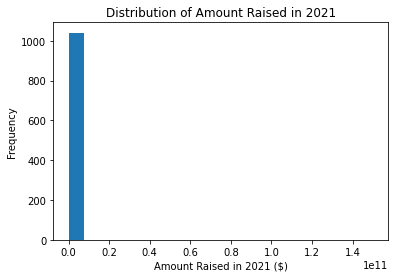

In [263]:
# Plotting A histogram to visualize the distribution of funding

# Histogram
plt.hist(data2021['Amount'], bins=20)
plt.xlabel('Amount Raised in 2021 ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Amount Raised in 2021')
plt.show()

In [264]:
impute_value = data2021['Amount'].median()
data2021['Amount']= data2021['Amount'].fillna(impute_value)

In [265]:
data2021['Amount'].isnull().sum()

0

In [266]:

data2021['Amount'].unique()

array([1.20e+06, 1.20e+08, 3.00e+07, 5.10e+07, 2.00e+06, 1.88e+08,
       2.00e+05, 3.55e+06, 1.00e+06, 3.00e+06, 1.00e+05, 7.00e+05,
       9.00e+06, 4.00e+07, 4.90e+07, 4.00e+05, 3.00e+05, 2.50e+07,
       1.60e+08, 1.50e+05, 1.80e+06, 5.00e+06, 8.50e+05, 5.30e+07,
       5.00e+05, 1.10e+06, 6.00e+06, 8.00e+05, 1.00e+07, 2.10e+07,
       7.50e+06, 2.60e+07, 7.40e+06, 1.50e+06, 6.00e+05, 8.00e+08,
       1.70e+07, 3.50e+06, 1.50e+07, 2.15e+08, 2.50e+06, 3.50e+08,
       5.50e+06, 8.30e+07, 1.10e+08, 5.00e+08, 6.50e+07, 1.50e+11,
       3.00e+08, 2.20e+06, 3.50e+07, 1.40e+08, 4.00e+06, 1.30e+07,
       9.50e+06, 8.00e+06, 1.20e+07, 1.70e+06, 1.50e+08, 1.00e+08,
       2.25e+08, 6.70e+06, 1.30e+06, 2.00e+07, 2.50e+05, 5.20e+07,
       3.80e+06, 1.75e+07, 4.20e+07, 2.30e+06, 7.00e+06, 4.50e+08,
       2.80e+07, 8.50e+06, 3.70e+07, 3.70e+08, 1.60e+07, 4.40e+07,
       7.70e+05, 1.25e+08, 5.00e+07, 4.90e+06, 1.45e+08, 2.20e+07,
       7.00e+07, 6.60e+06, 3.20e+07, 2.40e+07, 7.25e+05, 4.61e

In [267]:
data2021.describe()

,Founded,Amount
count,1186.000000,1.187000e+03
mean,2016.634064,1.517148e+08
std,4.519548,4.353713e+09
min,1963.000000,0.000000e+00
25%,2015.000000,1.000000e+06
50%,2018.000000,3.550000e+06
75%,2020.000000,1.100000e+07
max,2021.000000,1.500000e+11


In [268]:
data2021['Amount'].isnull().sum()

0

In [269]:
data2021['Amount'].unique()

array([1.20e+06, 1.20e+08, 3.00e+07, 5.10e+07, 2.00e+06, 1.88e+08,
       2.00e+05, 3.55e+06, 1.00e+06, 3.00e+06, 1.00e+05, 7.00e+05,
       9.00e+06, 4.00e+07, 4.90e+07, 4.00e+05, 3.00e+05, 2.50e+07,
       1.60e+08, 1.50e+05, 1.80e+06, 5.00e+06, 8.50e+05, 5.30e+07,
       5.00e+05, 1.10e+06, 6.00e+06, 8.00e+05, 1.00e+07, 2.10e+07,
       7.50e+06, 2.60e+07, 7.40e+06, 1.50e+06, 6.00e+05, 8.00e+08,
       1.70e+07, 3.50e+06, 1.50e+07, 2.15e+08, 2.50e+06, 3.50e+08,
       5.50e+06, 8.30e+07, 1.10e+08, 5.00e+08, 6.50e+07, 1.50e+11,
       3.00e+08, 2.20e+06, 3.50e+07, 1.40e+08, 4.00e+06, 1.30e+07,
       9.50e+06, 8.00e+06, 1.20e+07, 1.70e+06, 1.50e+08, 1.00e+08,
       2.25e+08, 6.70e+06, 1.30e+06, 2.00e+07, 2.50e+05, 5.20e+07,
       3.80e+06, 1.75e+07, 4.20e+07, 2.30e+06, 7.00e+06, 4.50e+08,
       2.80e+07, 8.50e+06, 3.70e+07, 3.70e+08, 1.60e+07, 4.40e+07,
       7.70e+05, 1.25e+08, 5.00e+07, 4.90e+06, 1.45e+08, 2.20e+07,
       7.00e+07, 6.60e+06, 3.20e+07, 2.40e+07, 7.25e+05, 4.61e

**Droping unwanted columns and rename others**

In [270]:
# Dropping the columns that are not important to our analysis

data2021.drop(columns=['Founders','Founded','Investor'], inplace=True)

In [271]:
data2021.rename(columns = {'Company_Brand':'Company',
                        'HeadQuarter':'Location',
                        'What_it_does':'About'},
             inplace = True)

In [272]:
data2021.columns

Index(['Company', 'Location', 'Sector', 'About', 'Amount', 'Stage'], dtype='object')

**Creating a new column 'Year' and setting it to 2021**

In [273]:
# create a new column 'Year' and set it to 2021 to differentiate it from the other datasets
data2021.insert(0,'Year', 2021)
data2021.head()

,Year,Company,Location,Sector,About,Amount,Stage
0,2021,Unbox Robotics,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,1200000.0,Pre-series A
1,2021,upGrad,Mumbai,EdTech,UpGrad is an online higher education platform.,120000000.0,Notknown
2,2021,Lead School,Mumbai,EdTech,LEAD School offers technology based school tra...,30000000.0,Series D
3,2021,Bizongo,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,51000000.0,Series C
4,2021,FypMoney,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",2000000.0,Seed


## CONCATENATE ALL THE 4 CLEANED DATASETS

In [274]:
# new_data2018 = pd.read_csv('data2018.csv')
# new_data2019 = pd.read_csv('data2019.csv')
# new_data2020 = pd.read_csv('data2020.csv')
# new_data2021 = pd.read_csv('data2021.csv')


In [275]:
# Concatenate datasets vertically
concatenated_dataset = pd.concat([data2018, data2019, data2020, data2021], axis=0)

# Reset the index if needed
concatenated_dataset.reset_index(drop=True, inplace=True)

In [276]:
concatenated_dataset

,Year,Company,Sector,Stage,Amount,Location,About
0,2018,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.00,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,2018,Happy Cow Dairy,"Agriculture, Farming",Seed,485093.94,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,2018,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,788277.65,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,2018,PayMe India,"Financial Services, FinTech",Angel,2000000.00,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,2018,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0.00,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...,...
2848,2021,Gigforce,Staffing & Recruiting,Pre-series A,3000000.00,Gurugram,A gig/on-demand staffing company.
2849,2021,Vahdam,Food & Beverages,Series D,20000000.00,New Delhi,VAHDAM is among the world’s first vertically i...
2850,2021,Leap Finance,Financial Services,Series C,55000000.00,Bangalore,International education loans for high potenti...
2851,2021,CollegeDekho,EdTech,Series B,26000000.00,Gurugram,"Collegedekho.com is Student’s Partner, Friend ..."


In [277]:
concatenated_dataset.isnull().sum()

Year        0
Company     0
Sector      5
Stage       0
Amount      0
Location    0
About       0
dtype: int64

In [278]:
# Remove rows with null values in any column
concatenated_dataset.dropna(how='any', inplace=True)

In [279]:
concatenated_dataset.isnull().sum()

Year        0
Company     0
Sector      0
Stage       0
Amount      0
Location    0
About       0
dtype: int64

In [280]:
concatenated_dataset

,Year,Company,Sector,Stage,Amount,Location,About
0,2018,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.00,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,2018,Happy Cow Dairy,"Agriculture, Farming",Seed,485093.94,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,2018,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,788277.65,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,2018,PayMe India,"Financial Services, FinTech",Angel,2000000.00,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,2018,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0.00,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...,...
2848,2021,Gigforce,Staffing & Recruiting,Pre-series A,3000000.00,Gurugram,A gig/on-demand staffing company.
2849,2021,Vahdam,Food & Beverages,Series D,20000000.00,New Delhi,VAHDAM is among the world’s first vertically i...
2850,2021,Leap Finance,Financial Services,Series C,55000000.00,Bangalore,International education loans for high potenti...
2851,2021,CollegeDekho,EdTech,Series B,26000000.00,Gurugram,"Collegedekho.com is Student’s Partner, Friend ..."


## Testing the null hypothesis

1.To test the null hypothesis that the stage of a company has no impact on the amount of funding it receives.

In [281]:
# Perform ANOVA test
anova_result = f_oneway(*[group['Amount'] for _, group in concatenated_dataset.groupby('Stage')])

# Extract p-value from the ANOVA result
p_value = anova_result.pvalue

# Set the significance level (alpha)
alpha = 0.05

# Compare p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis. The stage of a company has an impact on the amount of funding it receives.")
else:
    print("Fail to reject the null hypothesis. The stage of a company has no impact on the amount of funding it receives.")

Fail to reject the null hypothesis. The stage of a company has no impact on the amount of funding it receives.


2.To test the null hypothesis that the location of a company has no impact on the amount of funding it receives.

In [282]:
# Perform ANOVA test
anova_result = f_oneway(*[group['Amount'] for _, group in concatenated_dataset.groupby('Location')])

# Extract p-value from the ANOVA result
p_value = anova_result.pvalue

# Set the significance level (alpha)
alpha = 0.05

# Compare p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis. The location of a company has an impact on the amount of funding it receives.")
else:
    print("Fail to reject the null hypothesis. The location of a company has no impact on the amount of funding it receives.")

Fail to reject the null hypothesis. The location of a company has no impact on the amount of funding it receives.


3.To test the null hypothesis that the sector of a company has no impact on the amount of funding it receives.

In [283]:
# Perform ANOVA test
anova_result = f_oneway(*[group['Amount'] for _, group in concatenated_dataset.groupby('Sector')])

# Extract p-value from the ANOVA result
p_value = anova_result.pvalue

# Set the significance level (alpha)
alpha = 0.05

# Compare p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis. The sector of a company has an impact on the amount of funding it receives.")
else:
    print("Fail to reject the null hypothesis. The sector of a company has no impact on the amount of funding it receives.")

Fail to reject the null hypothesis. The sector of a company has no impact on the amount of funding it receives.


## Exploratory Data Analysis (EDA)

#### Univariate Analysis

In [284]:
concatenated_dataset

,Year,Company,Sector,Stage,Amount,Location,About
0,2018,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.00,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,2018,Happy Cow Dairy,"Agriculture, Farming",Seed,485093.94,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,2018,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,788277.65,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,2018,PayMe India,"Financial Services, FinTech",Angel,2000000.00,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,2018,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0.00,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...,...
2848,2021,Gigforce,Staffing & Recruiting,Pre-series A,3000000.00,Gurugram,A gig/on-demand staffing company.
2849,2021,Vahdam,Food & Beverages,Series D,20000000.00,New Delhi,VAHDAM is among the world’s first vertically i...
2850,2021,Leap Finance,Financial Services,Series C,55000000.00,Bangalore,International education loans for high potenti...
2851,2021,CollegeDekho,EdTech,Series B,26000000.00,Gurugram,"Collegedekho.com is Student’s Partner, Friend ..."


<AxesSubplot:>

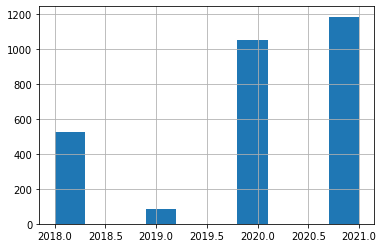

In [285]:
# Univariate analysis for the 'Year' column
year_data = concatenated_dataset['Year']
year_data.describe()  # Summary statistics
year_data.value_counts()  # Frequency counts
year_data.hist()  # Histogram

### Univariate analysis for the 'Company' column

In [286]:
# Univariate analysis for the 'Company' column
company_data = concatenated_dataset['Company']
company_data.value_counts()  # Frequency counts

BharatPe        10
Zomato           7
MPL              6
Vedantu          6
Spinny           6
                ..
mHealth          1
Svish            1
Jambox Games     1
ExMyB            1
Ketos            1
Name: Company, Length: 2207, dtype: int64

### Univariate analysis for the 'Location' column


In [287]:
# Univariate analysis for the 'Location' column by top 10
company_data = concatenated_dataset['Location']
companies = company_data.value_counts().head(10)
print(companies)

Bangalore                      757
Mumbai                         373
Gurugram                       238
New Delhi                      179
Bangalore, Karnataka, India    161
Notavailable                   113
Mumbai, Maharashtra, India      94
Chennai                         87
Pune                            84
Delhi                           72
Name: Location, dtype: int64


### Univariate analysis for the 'Sector' column

In [288]:
# Univariate analysis for the 'Sector' column
company_data = concatenated_dataset['Sector']
company_data.value_counts()  # Frequency counts


FinTech                                                                           257
EdTech                                                                            215
Financial Services                                                                 75
E-commerce                                                                         73
AgriTech                                                                           43
                                                                                 ... 
Computer & Network Security                                                         1
Crowdfunding, Financial Services, Internet                                          1
Cloud Computing, Enterprise Software, Network Hardware, Network Security, SaaS      1
HRTech                                                                              1
Crowdsourcing                                                                       1
Name: Sector, Length: 869, dtype: int64

### Univariate analysis for the 'Amount' column

In [289]:
concatenated_dataset['Amount'].describe()

count    2.848000e+03
mean     9.852320e+07
std      3.102311e+09
min      0.000000e+00
25%      9.000000e+05
50%      3.000000e+06
75%      8.000000e+06
max      1.500000e+11
Name: Amount, dtype: float64

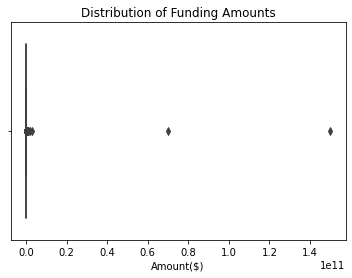

In [290]:
# Distribution of funding amounts using a boxplot
sns.boxplot(x=concatenated_dataset['Amount'])
plt.xlabel('Amount($)')
plt.title('Distribution of Funding Amounts')
plt.show()

### Univariate analysis for the 'Stage' column

In [291]:
# Univariate analysis for the 'Stage' column
company_data = concatenated_dataset['Stage']
company_data.value_counts()  # Frequency counts

Notknown                                                                                                   925
Seed                                                                                                       599
Series A                                                                                                   302
Pre-series A                                                                                               208
Series B                                                                                                   133
                                                                                                          ... 
Seed fund                                                                                                    1
Series B+                                                                                                    1
https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593      1
S

## Multivariate Analysis

### scatter plot betwween Amount and Year

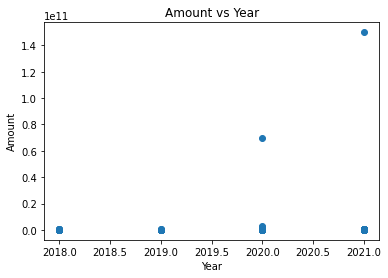

In [292]:
# Scatter plot: Amount($) vs Year
plt.scatter(concatenated_dataset['Year'], concatenated_dataset['Amount'])
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Amount vs Year')
plt.show()

### Box plot betwween Amount and Year

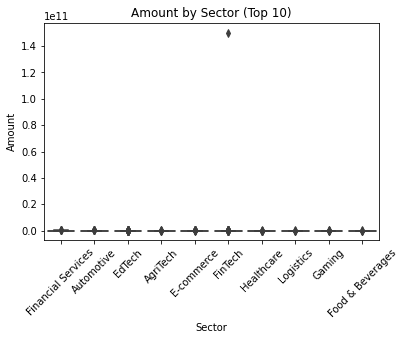

In [293]:
## Box plot: Amount by top 10 Sectors  
# Top 10 sectors
top_10_sectors = concatenated_dataset['Sector'].value_counts().head(10)

# Filter the dataset for top 10 sectors
filtered_df = concatenated_dataset[concatenated_dataset['Sector'].isin(top_10_sectors.index)]

# Box plot: Amount($) by Sector (Top 10)
sns.boxplot(x=filtered_df['Sector'], y=filtered_df['Amount'])
plt.xlabel('Sector')
plt.ylabel('Amount')
plt.title('Amount by Sector (Top 10)')
plt.xticks(rotation=45)
plt.show()

### Funding Stage by Sector

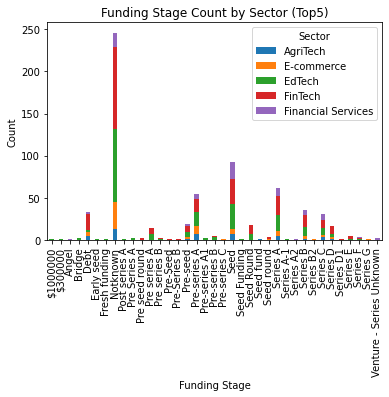

In [294]:
## Funding Stage count by Top 10 sectors
# Top 10 sectors
top_5_sectors = concatenated_dataset['Sector'].value_counts().head(5)

# Filter the dataset for top 10 sectors
filtered_df = concatenated_dataset[concatenated_dataset['Sector'].isin(top_5_sectors.index)]

# Grouped bar plot: Funding Stage count by Sector (Top 10)
stage_sector = filtered_df.groupby(['Stage', 'Sector']).size().unstack()
stage_sector.plot(kind='bar', stacked=True)

plt.xlabel('Funding Stage')
plt.ylabel('Count')
plt.title('Funding Stage Count by Sector (Top5)')
plt.legend(title='Sector', loc='upper right')
plt.show()

## Answering the Questions

***1. Which sector attracted the largest funding?***

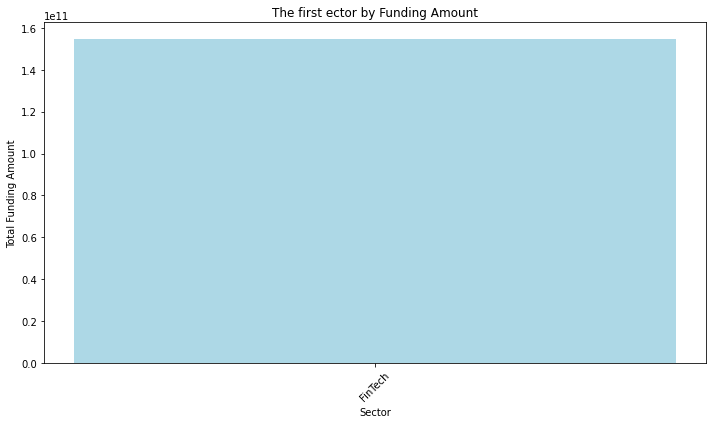

In [295]:
# Group data by sector and calculate total funding per sector
funding_per_sector = concatenated_dataset.groupby('Sector')['Amount'].sum().reset_index()

# Sort the data by funding amount in descending order
funding_per_sector = funding_per_sector.sort_values(by='Amount', ascending=False)

# Get the top 5 sectors with the highest funding amounts
top_5_sectors = funding_per_sector.head(1)

# Create a bar chart to visualize the funding distribution for the top 5 sectors
plt.figure(figsize=(10, 6))
plt.bar(top_5_sectors['Sector'], top_5_sectors['Amount'], color='lightblue')
plt.xlabel('Sector')
plt.ylabel('Total Funding Amount')
plt.title('The first ector by Funding Amount')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2. What is the range of funds (max_Amount, min_Amount, mean_Amount, median_Amount, std_Amount of funding)? in the dataset?

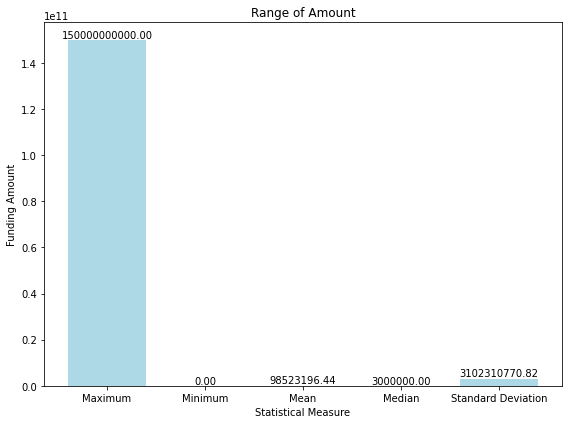

In [296]:
# Calculate the statistical measures of the funding amounts in the entire dataset
max_amount = concatenated_dataset['Amount'].max()
min_amount = concatenated_dataset['Amount'].min()
mean_amount = concatenated_dataset['Amount'].mean()
median_amount = concatenated_dataset['Amount'].median()
std_amount = concatenated_dataset['Amount'].std()

# Create a bar chart to visualize the range of Amount
plt.figure(figsize=(8, 6))
plt.bar(['Maximum', 'Minimum', 'Mean', 'Median', 'Standard Deviation'], [max_amount, min_amount, mean_amount, median_amount, std_amount], color='lightblue')
plt.xlabel('Statistical Measure')
plt.ylabel('Funding Amount')
plt.title('Range of Amount')

# Add the funding amounts on top of each bar
for i, v in enumerate([max_amount, min_amount, mean_amount, median_amount, std_amount]):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

3. Which are 5 top sectors with most companies?

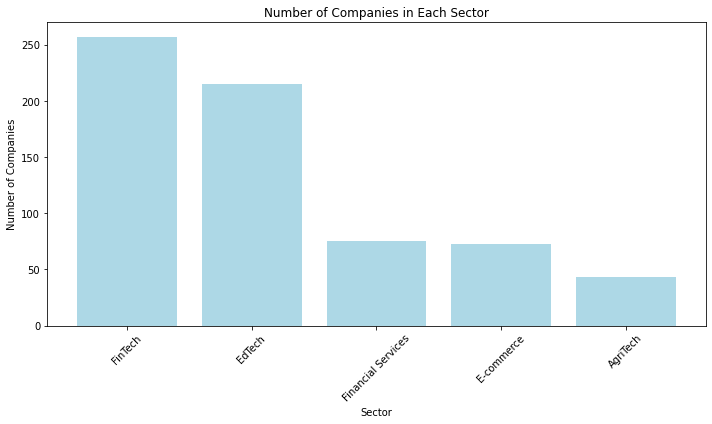

In [297]:
# Get the count of companies in each sector
sector_counts = concatenated_dataset['Sector'].value_counts().head(5)

# Create a bar chart to visualize the number of companies in each sector
plt.figure(figsize=(10, 6))
plt.bar(sector_counts.index, sector_counts.values, color='lightblue')
plt.xlabel('Sector')
plt.ylabel('Number of Companies')
plt.title('Number of Companies in Each Sector')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 4. Which are the top 5 companies in the funding amounts?

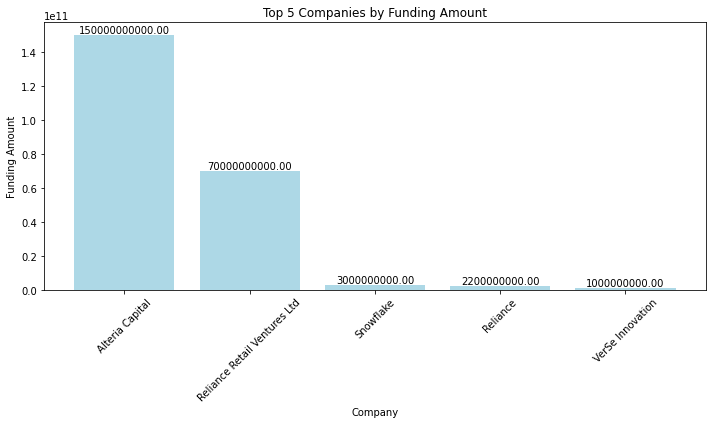

In [298]:
# Sort the data by funding amount in descending order
df_sorted = concatenated_dataset.sort_values(by='Amount', ascending=False)

# Get the top 5 companies with the highest funding amounts
top_5_companies = df_sorted.head(5)

# Create a bar chart to visualize the funding amounts for the top 5 companies
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_companies['Company'], top_5_companies['Amount'], color='lightblue')
plt.xlabel('Company')
plt.ylabel('Funding Amount')
plt.title('Top 5 Companies by Funding Amount')

plt.xticks(rotation=45)
plt.tight_layout()

# Add the funding amounts on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

5. Are there any outliers in the funding amounts in the datasets?

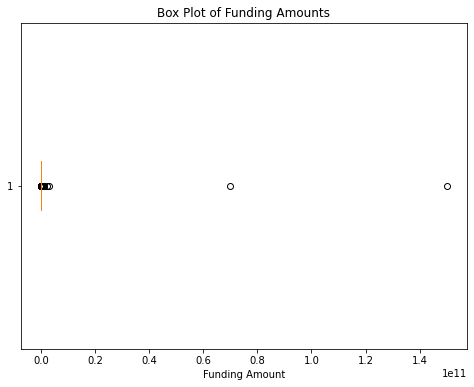

In [299]:
# Create a box plot to visualize the distribution of funding amounts
plt.figure(figsize=(8, 6))
plt.boxplot(concatenated_dataset['Amount'], vert=False)
plt.xlabel('Funding Amount')
plt.title('Box Plot of Funding Amounts')

plt.show()

From the box-plot above, there is an outlier in the company

Let's show this on the bar chart

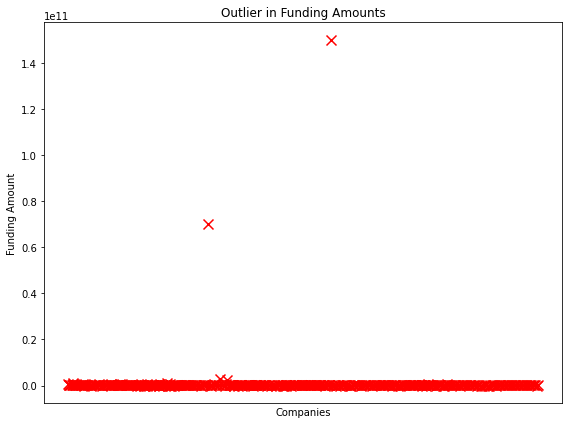

In [300]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = concatenated_dataset['Amount'].quantile(0.25)
Q3 = concatenated_dataset['Amount'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Identify outliers
outliers = concatenated_dataset[(concatenated_dataset['Amount'] > upper_bound) | (concatenated_dataset['Amount'] < lower_bound)]

# Create a scatter plot to show only the outlier
plt.figure(figsize=(8, 6))
plt.scatter(outliers['Company'], outliers['Amount'], color='red', marker='x', s=100)
plt.xlabel('Companies')
plt.ylabel('Funding Amount')
plt.title('Outlier in Funding Amounts')

# Set x-axis labels to display no outlier Company name
plt.xticks([])

# Show the plot
plt.tight_layout()
plt.show()

6. Which top 5 locations have the highest number of companies in the datasets?

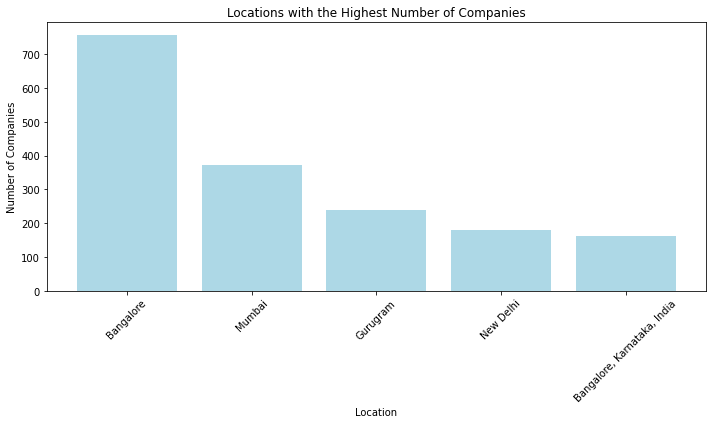

In [301]:
# Get the count of companies in each location
location_counts = concatenated_dataset['Location'].value_counts()

# Get the top 5 locations with the highest number of companies
top_5_locations = location_counts.head(5)

# Create a bar chart to visualize the number of companies in each location
plt.figure(figsize=(10, 6))
plt.bar(top_5_locations.index, top_5_locations.values, color='lightblue')
plt.xlabel('Location')
plt.ylabel('Number of Companies')
plt.title('Locations with the Highest Number of Companies')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()







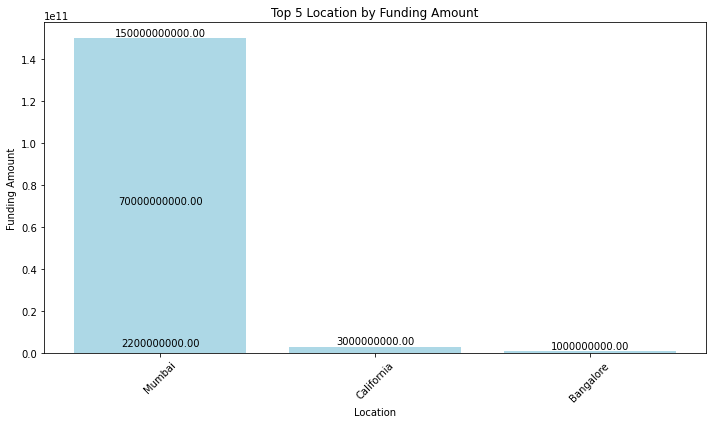

In [302]:
# Sort the data by funding amount in descending order
df_sorted = concatenated_dataset.sort_values(by='Amount', ascending=False)

# Get the top 5 companies with the highest funding amounts
top_5_locations = df_sorted.head(5)

# Create a bar chart to visualize the funding amounts for the top 5 companies
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_companies['Location'], top_5_locations['Amount'], color='lightblue')
plt.xlabel('Location')
plt.ylabel('Funding Amount')
plt.title('Top 5 Location by Funding Amount')

plt.xticks(rotation=45)
plt.tight_layout()

# Add the funding amounts on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

7. What is the range of funds (max_Amount, min_Amount, mean_Amount, median_Amount, std_Amount of funding)? in the location with the highest number of companies.

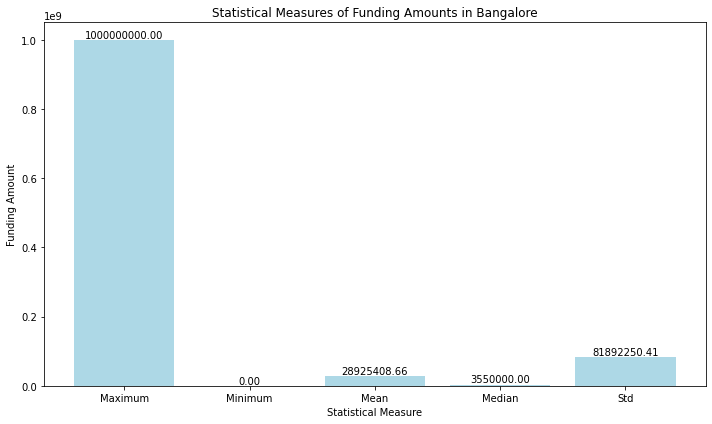

In [303]:

# Filter the dataset to include only rows where the location is "Bangalore"
df_Bangalore = concatenated_dataset[concatenated_dataset['Location'] == 'Bangalore']

# Calculate the statistical measures of the funding amounts in Bangalore
max_Amount = df_Bangalore['Amount'].max()
min_Amount = df_Bangalore['Amount'].min()
mean_Amount = df_Bangalore['Amount'].mean()
median_Amount = df_Bangalore['Amount'].median()
std_Amount = df_Bangalore['Amount'].std()

# Create a bar chart to visualize the range of Amount in Bangalore
plt.figure(figsize=(10, 6))
bars = plt.bar(['Maximum', 'Minimum', 'Mean', 'Median', 'Std'], [max_Amount, min_Amount, mean_Amount, median_Amount, std_Amount], color='lightblue')
plt.xlabel('Statistical Measure')
plt.ylabel('Funding Amount')
plt.title('Statistical Measures of Funding Amounts in Bangalore')

# Add the funding amounts on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

**8. What is the trend in startup funding in India over the years (2018-2021) ?**

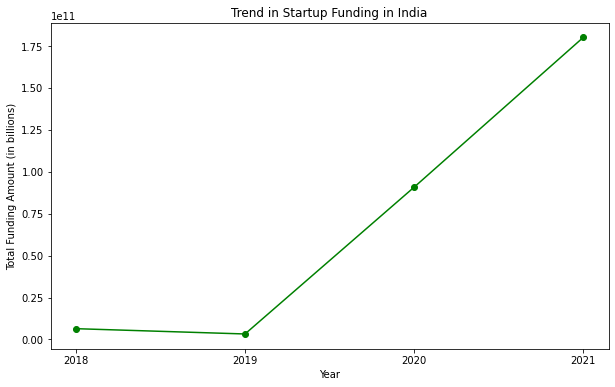

In [304]:

# Filter the concatenated_dataset to include only the desired years
years = [2018, 2019, 2020, 2021]
df = concatenated_dataset[concatenated_dataset['Year'].isin(years)]

# the total funding amount for each year
funding_by_year = df.groupby('Year')['Amount'].sum()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(funding_by_year.index, funding_by_year.values, marker='o', color='green')

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Total Funding Amount (in billions)')
plt.title('Trend in Startup Funding in India')

# Set the x-axis ticks to only display the desired years
plt.xticks(funding_by_year.index)

# Display the plot
plt.show()

## Insights and Recommendations

### 1.Trend in Startup Funding

The trend in startup funding in India has shown that there is consistent growth over the years. From 2018 to 2019, there was a decrease, and from 2019 to 2021, there was a remarkable growth in the total funding amount accessed by Indian startups. This indicates a positive transformation and increasing investor interest in the Indian startup ecosystem. Startups should showcase their potential and seeking funding opportunities during this favorable period.

### 2.Relationship between Startup stage and Funding.

The stage of a company has no impact on the amount of funding it receives. This implies that the stage alone may not be a determining factor in securing funding. Startups from various stages have received funding, and therefore, it is important for startups to focus on other factors such as their value proposition, business model, and growth potential when seeking funding.

### 3.Relationship between Startup location and Funding.

The location of a company has no impact on the amount of funding it receives. The analysis did not find a significant relationship between the location of a startup's headquarters and the amount of funding they receive. This suggests that the location alone may not be a decisive factor in funding decisions. Startups should focus on other aspects

### 4.Relationship between Startup sector and Funding.

The sector of a company has no impact on the amount of funding it receives. The analysis did not find a significant relationship between the sector of a startup's headquarters and the amount of funding they receive. This suggests that the location alone may not be a decisive factor in funding decisions. Startups should focus on other aspects

## Conclusion

In conclusion, while the sector, location and stage of a startup may not have a significant impact on funding outcomes, startups can enhance their chances of securing funding by focusing on factors such as market potential, value proposition, team expertise, and adapting their fundraising strategies based on market trends and investor preferences.